#Machine Learning Project Code

#NYPD Crime Arrest Data

#Group 11

#Team Members - 



1.  Aniket Sakharkar
2.  Mayur Mahanta
3.  Jwalit Shah
4.  Dev Patel


#1. Data Collection and Processing
#Importing the Data Set

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("ai4i2020.csv")
df

Saving ai4i2020.csv to ai4i2020.csv


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
#checking our data dimension
df.shape

(10000, 14)

In [ ]:
#concise summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
#creating a new dataframe to isolated raw data for visualizaition purpose
#and model data for the model building phase
Model_data=df.copy()
Model_data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(Model_data['Type'])
 
# printing label
label

array([2, 1, 1, ..., 2, 0, 2])

In [ ]:
# removing the column 'Purchased' from df
# as it is of no use now.
Model_data.drop("Type", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
Model_data["Type"] = label

Changed Type Feature which consisted of: 
[ Low, Medium, High ]

To numerical values depicting the same:
[ 0, 1, 2 ]

In [ ]:
#model data after label encoding (Converting Categorical to Numerical Data)
Model_data

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,2
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,2
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,0


In [ ]:
#taking our target variable and storing it in y or output set
y = Model_data['Machine failure']
#consecutively, dropping the target variable or input set
x=Model_data.drop('Machine failure',axis=1)

In [ ]:
#checking groups in our target variable
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [ ]:
#checking for null values in our input set
x.isnull().sum()

UDI                        0
Product ID                 0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Type                       0
dtype: int64

In [ ]:
Viz_data = Model_data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']].copy()

#2. Data Exploration and Visualization

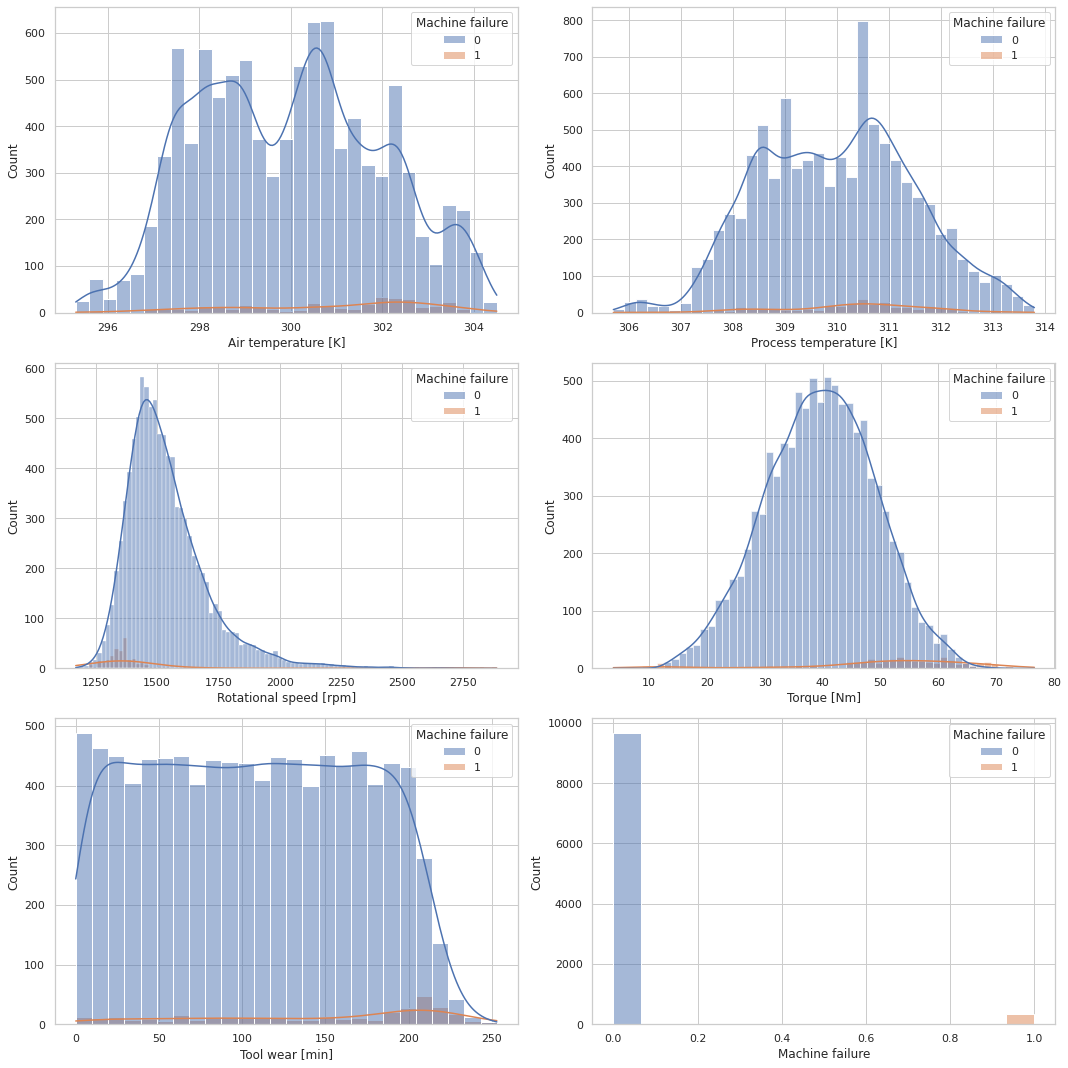

In [ ]:
#plotting histogram to understand individiual variable distribution
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(3,2, figsize = (15,15))
sns.histplot(data=Viz_data, x="Air temperature [K]", kde=True, hue='Machine failure', ax=axs[0, 0])
sns.histplot(data=Viz_data, x="Process temperature [K]", kde=True, hue='Machine failure', ax=axs[0, 1])
sns.histplot(data=Viz_data, x="Rotational speed [rpm]", kde=True, hue='Machine failure', ax=axs[1, 0])
sns.histplot(data=Viz_data, x="Torque [Nm]", kde=True, hue='Machine failure', ax=axs[1, 1])
sns.histplot(data=Viz_data, x="Tool wear [min]", kde=True, hue='Machine failure', ax=axs[2, 0])
sns.histplot(data=Viz_data, x="Machine failure", kde=True, hue='Machine failure', ax=axs[2, 1])
fig.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

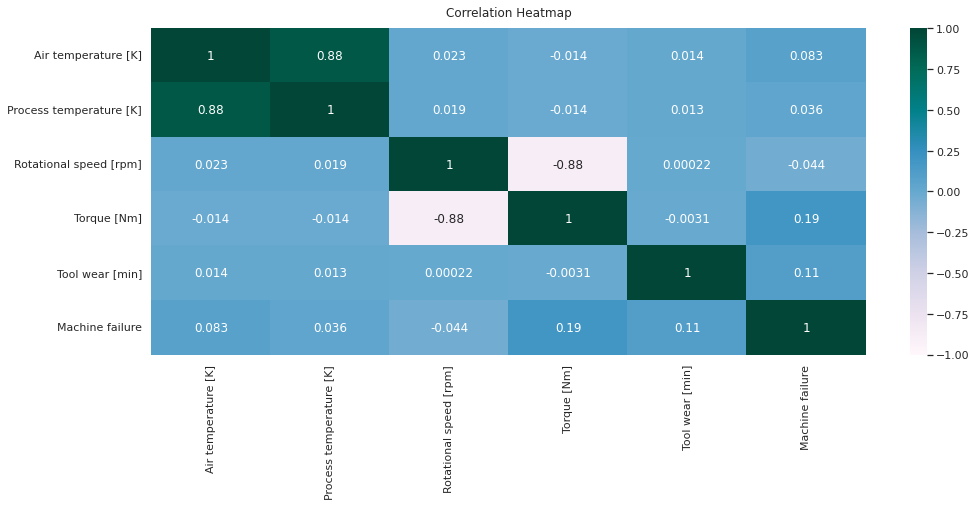

In [ ]:
#plotting the heatmap on data without standardization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(Viz_data.corr(), vmin=-1, vmax=1, annot=True, cmap='PuBuGn')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

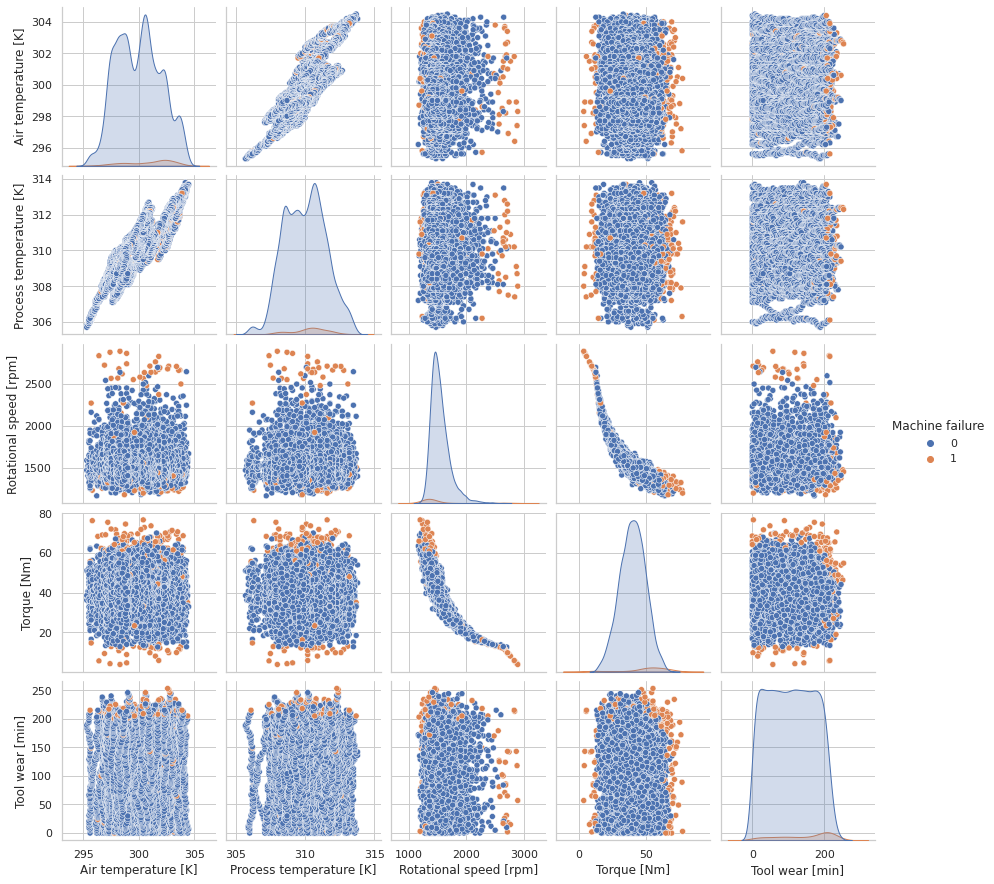

In [ ]:
#plotting a scatterplot matrix on the original raw data frame
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Viz_data,hue='Machine failure')

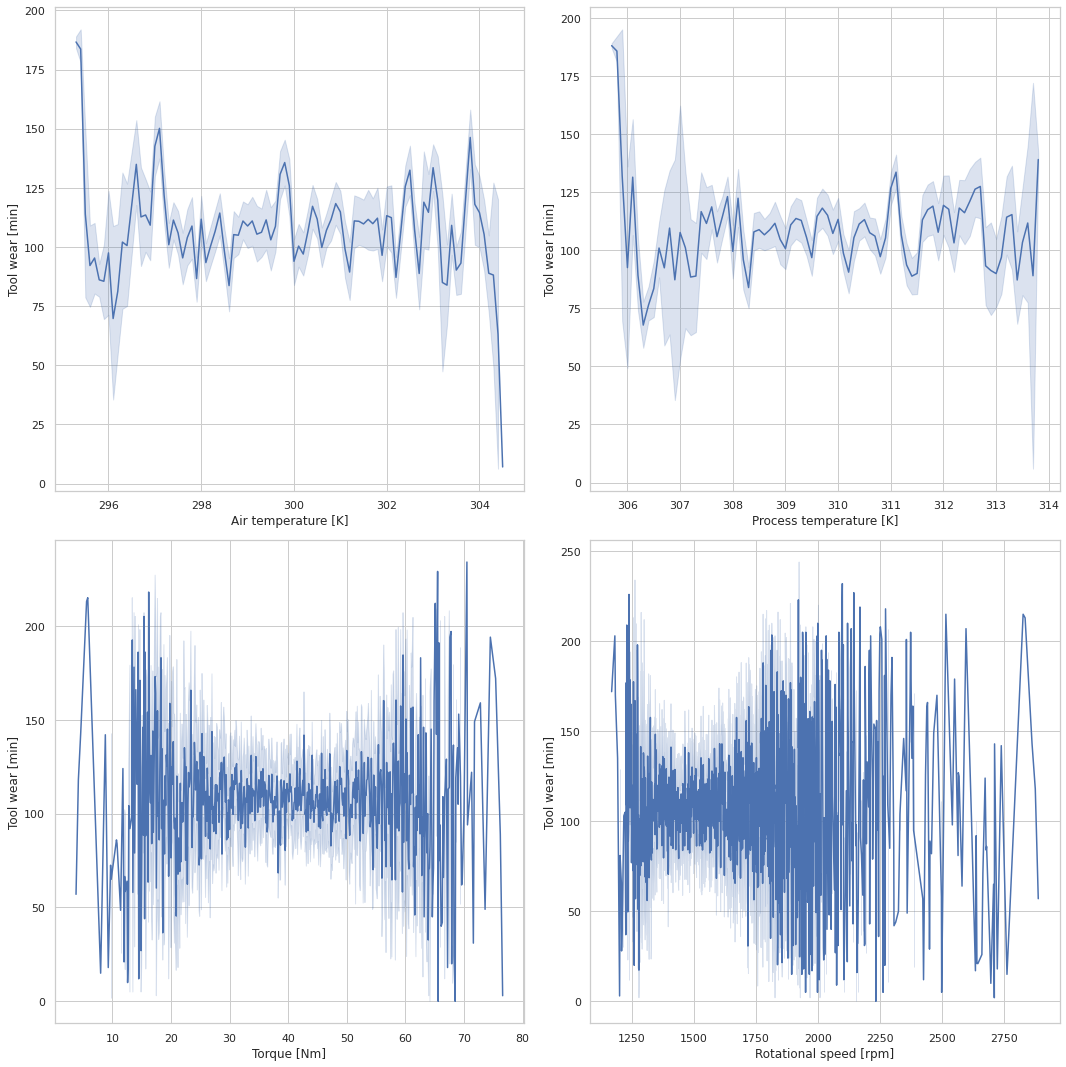

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,2, figsize = (15,15))
sns.lineplot(data=Viz_data, x="Air temperature [K]", y="Tool wear [min]", ax=axs[0, 0])
sns.lineplot(data=Viz_data, x="Process temperature [K]", y="Tool wear [min]", ax=axs[0, 1])
sns.lineplot(data=Viz_data, x="Torque [Nm]", y="Tool wear [min]", ax=axs[1, 0])
sns.lineplot(data=Viz_data, x="Rotational speed [rpm]", y="Tool wear [min]", ax=axs[1, 1])
fig.tight_layout()

In [ ]:
df_count  = df['UDI']
df_count

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: UDI, Length: 10000, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


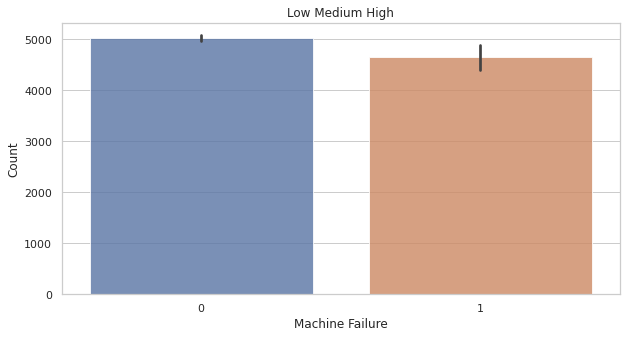

In [ ]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
df_count  = df['UDI']
plt.figure(figsize=(10,5))
sns.barplot(df['Machine failure'], df_count,  alpha=0.8)
plt.title('Low Medium High')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Machine Failure', fontsize=12)
plt.show()